<a href="https://colab.research.google.com/github/Forger-888/Baysys-3-Stop-Watch/blob/main/Simulation/simT02_Basys3_StopWatch_SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("[INFO]: Init the Verilog ENV")
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

[INFO]: Init the Verilog ENV


# T02: Stopwatch on Basys 3

## Digital Systems Lab Group 4
Ho Wei Rui 1007205

Lai Si Yuan 1007210

Lim Chun Yang Samuel 1007206

Qistina Binte Mohd Sahril 1007216

## Objective:


Design and implement a **stopwatch** on the **Basys 3 FPGA** board using Verilog, making use of the **4-digit** **7-segment** display LEDs for time display. The stopwatch should have the following features:  
1. **Reset functionality**: Press a button (e.g., `btnR`) to restart the stopwatch.  
2. **Time Display**: Display the elapsed time in minutes and seconds on the 4-digit 7-segment display.  
3. **Update Frequency**: Update the display at a reasonable frequency (e.g., every 1 second).

# Stopwatch code is at the bottom

# Verilog HDL Block - SSD (Seven Segment Display)

## Seven Segment Display (SSD) for Basys-3

![Basys 3 Board Feature](https://digilent.com/reference/_media/basys3_hardware_walkaround.png)

Figure: Basys-3 board features.

![7 Segment Display](https://digilent.com/reference/_media/basys3-_seven_segment_display_driving.png?w=600&tok=0639f2)

Figure: 7-segment display LEDs configuration.

![7-segment LED display for decimal number from 0 to 9](https://digilent.com/reference/_media/basys3-_seven_segment_display.png?w=600&tok=b48b86)

Figure: 7-segment LED display for decimal number from 0 to 9.

![7 Segment Display on the Basys3](https://digilent.com/reference/_media/basys3-_basic_io_block_diagram.png?w=600&tok=2661a2)

Figure: Basys-3 pins configuration.


<img src="https://github.com/pe8sutd/Colab_DSL_Practice25/blob/main/Simulation/img/SSDcircuit.svg?raw=1" width="250">

Figure: 7-segment display connectivity.

On Basys3 board, there are four Seven Segment Display (SSD), which are L3,L2,L1,L0. These four SSD shares the same CA to DP (W7 to V7). These SSD can be turned on through W4 to U2.

For example, to display a number '1' in L0:
U2 is set to LOW, as a PNP transistor (AN0) is used, a LOW at the Base of AN0 will turn on this transistor. All the LEDs in the 7-segment Display have a common Anode, and now the Anode is connected to 3.3 V.  To display '1', {CA,CB,CC,CD,CE,CF,CG,DP} = 8'b1001_1111. As CB=0, CC=0, the current can flow from 3.3 V to LOW potential (0 V).  

Table-1: Truth Table for Common Anode type BCD to Seven Segment Decoder, including DP.
- [d3,d2,d1,d0] Binary Coded Decimal (BCD), where 4-bits binary number is used to represent decimal numbers [d: 0-9].
- [CA,CB,CC,CD,CE,CF,CG,DP] 7-segment display LEDs, where LOW to light up if the corresponding [AN3,AN2,AN1,AN0] is LOW.
- The sequence of LEDs controlled bits can be [CA to CG] or [CA to DP] in binary coded, or more commonly hexadecimal.
- The sequence of LEDs controlled bits can also be [CG to CA] or [DP to CA] in binary coded, or more commonly hexadecimal.


Table-1: Truth Table for Common Anode type BCD to Seven Segment Decoder, including DP

| x | x | x  | x  | x  | x  | x | x  |    | x  | x  | x  | x  | x  | x  | x | x      | CA to DP    | CA to DP | x | DP to CA    | DP to CA | x |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:------:|:-----------:|:--------:|:---:|:-----------:|:--------:|:---:|
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| d |   | d3 | d2 | d1 | d0 |   | CA | CB | CC | CD | CE | CF | CG | DP |   | Common | Cathode     | Cathode  |   | Cathode     | Cathode  | d |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   | Anode  | [7:0]       | [7:0]    |   | [7:0]       | [7:0]    |   |
| 0 |   | 0  | 0  | 0  | 0  |   | 0  | 0  | 0  | 0  | 0  | 0  | 1  | 1  |   | 1’b1   | 8’b00000011 | 8'h03    |   | 8’b11000000 | 8'hC0    | 0 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 1 |   | 0  | 0  | 0  | 1  |   | 1  | 0  | 0  | 1  | 1  | 1  | 1  | 1  |   | 1’b1   | 8’b10011111 | 8'h9F    |   | 8’b11111001 | 8'hF9    | 1 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 2 |   | 0  | 0  | 1  | 0  |   | 0  | 0  | 1  | 0  | 0  | 1  | 0  | 1  |   | 1’b1   | 8’b00100101 | 8'h25    |   | 8’b10100100 | 8'hA4    | 2 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 3 |   | 0  | 0  | 1  | 1  |   | 0  | 0  | 0  | 0  | 1  | 1  | 0  | 1  |   | 1’b1   | 8’b00001101 | 8'h0D    |   | 8’b10110000 | 8'hB0    | 3 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 4 |   | 0  | 1  | 0  | 0  |   | 1  | 0  | 0  | 1  | 1  | 0  | 0  | 1  |   | 1’b1   | 8’b10011001 | 8'h99    |   | 8’b10011001 | 8'h99    | 4 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 5 |   | 0  | 1  | 0  | 1  |   | 0  | 1  | 0  | 0  | 1  | 0  | 0  | 1  |   | 1’b1   | 8’b01001001 | 8'h49    |   | 8’b10010010 | 8'h92    | 5 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 6 |   | 0  | 1  | 1  | 0  |   | 0  | 1  | 0  | 0  | 0  | 0  | 0  | 1  |   | 1’b1   | 8’b01000001 | 8'h41    |   | 8’b10000010 | 8'h82    | 6 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 7 |   | 0  | 1  | 1  | 1  |   | 0  | 0  | 0  | 1  | 1  | 1  | 1  | 1  |   | 1’b1   | 8’b00011111 | 8'h1F    |   | 8’b11111000 | 8'hF8    | 7 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 8 |   | 1  | 0  | 0  | 0  |   | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 1  |   | 1’b1   | 8’b00000001 | 8'h01    |   | 8’b10000000 | 8'h80    | 8 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 9 |   | 1  | 0  | 0  | 1  |   | 0  | 0  | 0  | 0  | 1  | 0  | 0  | 1  |   | 1’b1   | 8’b00001001 | 8'h09    |   | 8’b10010000 | 8'h09    | 9 |





Look into the constrain file below to figure out the connection.
https://github.com/Digilent/digilent-xdc/blob/master/Basys-3-Master.xdc

Uncomment the neccessary lines.

```
## Switches
#set_property -dict { PACKAGE_PIN V17   IOSTANDARD LVCMOS33 } [get_ports {sw[0]}]
#set_property -dict { PACKAGE_PIN V16   IOSTANDARD LVCMOS33 } [get_ports {sw[1]}]
#set_property -dict { PACKAGE_PIN W16   IOSTANDARD LVCMOS33 } [get_ports {sw[2]}]
#set_property -dict { PACKAGE_PIN W17   IOSTANDARD LVCMOS33 } [get_ports {sw[3]}]

##7 Segment Display
#set_property -dict { PACKAGE_PIN W7   IOSTANDARD LVCMOS33 } [get_ports {seg[0]}]
#set_property -dict { PACKAGE_PIN W6   IOSTANDARD LVCMOS33 } [get_ports {seg[1]}]
#set_property -dict { PACKAGE_PIN U8   IOSTANDARD LVCMOS33 } [get_ports {seg[2]}]
#set_property -dict { PACKAGE_PIN V8   IOSTANDARD LVCMOS33 } [get_ports {seg[3]}]
#set_property -dict { PACKAGE_PIN U5   IOSTANDARD LVCMOS33 } [get_ports {seg[4]}]
#set_property -dict { PACKAGE_PIN V5   IOSTANDARD LVCMOS33 } [get_ports {seg[5]}]
#set_property -dict { PACKAGE_PIN U7   IOSTANDARD LVCMOS33 } [get_ports {seg[6]}]

#set_property -dict { PACKAGE_PIN V7   IOSTANDARD LVCMOS33 } [get_ports dp]

#set_property -dict { PACKAGE_PIN U2   IOSTANDARD LVCMOS33 } [get_ports {an[0]}]
#set_property -dict { PACKAGE_PIN U4   IOSTANDARD LVCMOS33 } [get_ports {an[1]}]
#set_property -dict { PACKAGE_PIN V4   IOSTANDARD LVCMOS33 } [get_ports {an[2]}]
#set_property -dict { PACKAGE_PIN W4   IOSTANDARD LVCMOS33 } [get_ports {an[3]}]
```



## 7-segment Display Exercise

#### Q1

1. Creat a Verilog module to display number '1' on the L1 only, while the rest of L3, L2, L0 are off, by setting an[3:0] (an[3], an[2], an[1], an[0]) at a proper logic (0, or 1). Please verify if **an** must HIGH or LOW to turn on a SSD. If you follow the reference code, is the number display correctly?

##### Student Code

In [ ]:
`timescale 1ns / 1ps

module ssd(output[6:0]seg,output[3:0]an,output dp);

assign seg=7'b1001111; //LEDs in SSD - To on LED Segment need put 0 as the Cathod is alwanys High (create Voltage Difference)
assign an=4'b1101; //an, LOW to on L1
assign dp =1'b1;

endmodule

##### Reference Code

In [ ]:
%%verilog

module ssd(output[6:0]seg,output[3:0]an);

assign seg=7'b1001111; //LEDs in SSD
assign an=4'b1101; //an, LOW to on L1

endmodule

UsageError: Cell magic `%%verilog` not found.


#### Q2

2. In the above exercise, turn ON or OFF a SSD is preset. How to select with SSD to turn ON manually? Creat a Verilog module to display number '1' on the L3, L2, L1, or L0, by selecting inputs sw[3:0] (sw[3], sw[2], sw[1], sw[0]).

##### Student Code

In [ ]:
`timescale 1ns / 1ps

module ssd(output[6:0]seg,output[3:0]an,output dp, input [3:0]sw);

assign seg=7'b1001111; //LEDs in SSD - To on LED Segment need put 0 as the Cathod is alwanys High (create Voltage Difference)
assign an = sw; // sw to control which display
assign dp =1'b0;

endmodule

##### Reference Code

In [ ]:
%%verilog

module ssd(output[6:0]seg,output[3:0]an,input[3:0]sw);

assign seg=7'b1001111; //LEDs in SSD
assign an=sw; //sw to control an, LOW to on

endmodule

#### Q3

3. In the above exercise, number to be display is preset. How to select the display number manually? Creat a Verilog module to display numbers (0 to 9, by setting sw[7:4]) on the L3, L2, L1, or L0 （selecting inputs sw[3:0]).

Notes:
- Set default to display E for Error. Ignore DP.
- Can you display the right number? If not checking the sequence is CA to CG, or CG to CA?

##### Studeent Code

In [ ]:
module ssd(output reg[6:0]seg,output[3:0]an,input[7:0]sw);

always@(sw[7:4]) begin case(sw[7:4])
4'b0000:seg <= 7'b1000000;
4'b0001:seg <= 7'b1111001;
4'b0010:seg <= 7'b0100100;
4'b0011:seg <= 7'b0110000;
4'b0100:seg <= 7'b0011001;
4'b0101:seg <= 7'b0010010;
4'b0110:seg <= 7'b0000010;
4'b0111:seg <= 7'b1111000;
4'b1000:seg <= 7'b0000000;
4'b1001:seg <= 7'b0010000;
default:seg <= 7'b0000110;
endcase end

assign an=sw[3:0]; //sw to control an, LOW to on

endmodule

##### Reference code

In [ ]:
%%verilog

module ssd(output reg[6:0]seg,output[3:0]an,input[7:0]sw);

always@(sw[7:4]) begin case(sw[7:4])
4'b0000:seg <= 7'b1000000;
4'b0001:seg <= 7'b1111001;
4'b0010:seg <= 7'b0100100;
4'b0011:seg <= 7'b0110000;
4'b0100:seg <= 7'b0011001;
4'b0101:seg <= 7'b0010010;
4'b0110:seg <= 7'b0000010;
4'b0111:seg <= 7'b1111000;
4'b1000:seg <= 7'b0000000;
4'b1001:seg <= 7'b0010000;
default:seg <= 7'b0000110;
endcase end

assign an=sw[3:0]; //sw to control an, LOW to on

endmodule

#### Q4

4. Repeat Q2, but using only sw[1:0] to select L0 to L3 to display number '1'.

##### Student Code

In [ ]:
module ssd(output[6:0]seg,output reg[3:0]an,input[1:0]sw);
  assign seg=7'b1001111;
  always@(sw[1:0]) begin case(sw[1:0])
    2'b00:an<=4'b1110;
    2'b01:an<=4'b1101;
    2'b10:an<=4'b1011;
    2'b11:an<=4'b0111; endcase end
endmodule

##### Reference Code

In [ ]:
%%verilog

module ssd(output[6:0]seg,output reg[3:0]an,input[1:0]sw);
  assign seg=7'b1001111;
  always@(sw[1:0]) begin case(sw[1:0])
    2'b00:an<=4'b1110;
    2'b01:an<=4'b1101;
    2'b10:an<=4'b1011;
    2'b11:an<=4'b0111; endcase end
endmodule

#### Q5

5. In Figure: Basys-3 board features, it shows 5 pushbuttons (Callout-7). By using btnC, to display number '1' on L0, when press btnC. No number will be displayed when btnC is released.

```
##Buttons
#set_property -dict { PACKAGE_PIN U18   IOSTANDARD LVCMOS33 } [get_ports btnC]
#set_property -dict { PACKAGE_PIN T18   IOSTANDARD LVCMOS33 } [get_ports btnU]
#set_property -dict { PACKAGE_PIN W19   IOSTANDARD LVCMOS33 } [get_ports btnL]
#set_property -dict { PACKAGE_PIN T17   IOSTANDARD LVCMOS33 } [get_ports btnR]
#set_property -dict { PACKAGE_PIN U17   IOSTANDARD LVCMOS33 } [get_ports btnD]
```



##### Student Code

In [ ]:
module ssd(output[6:0]seg,output[3:0]an,input btnC);
  assign seg=7'b1001111;
  assign an=(btnC) ? 4'b1110 : 4'b1111;
endmodule

##### Reference Code

In [ ]:
%%verilog

module ssd(output[6:0]seg,output[3:0]an,input btnC);
  assign seg=7'b1001111;
  assign an=(btnC) ? 4'b1110 : 4'b1111;
endmodule


UsageError: Cell magic `%%verilog` not found.


In [ ]:
%%verilog

module ssd(output[6:0]seg,output reg[3:0]an,input btnC);
  assign seg=7'b1001111;
  always@(btnC) begin if (btnC) an=4'b1110; else an=4'b1111; end

endmodule

#### Q6

6. Using btnC to display the number '1' on L0, L1, L2, L3 in sequence. You need to use debounded_btnC as the following debounce module. The FPGA Basys 3 requires debounce module to handle the pushbuttons.

```
## Clock signal
#set_property -dict { PACKAGE_PIN W5   IOSTANDARD LVCMOS33 } [get_ports clk]
#create_clock -add -name sys_clk_pin -period 10.00 -waveform {0 5} [get_ports clk]
```

##### Student Code

In [ ]:
`timescale 1ns/1ps
module ssd(output[6:0]seg,output reg[3:0]an,input btnC,btnR,clk);
  reg[1:0]count;
  assign seg=7'b1001111;

  //btnR as reset?
  debounce d0 (.clk(clk),.reset(btnR),.button_in(btnC),.button_out(debounced_btnC));

  always@(posedge debounced_btnC)
    if (count != 2'b11) count <= count+1'b1;
    else count <= 2'b00;

  always@(count) begin case(count)
    2'b00: an<=4'b1110;
    2'b01: an<=4'b1101;
    2'b10: an<=4'b1011;
    2'b11: an<=4'b0111;
  endcase end

endmodule


module debounce (
    input wire clk,        // System clock (e.g., 100 MHz on Basys 3)
    input wire reset,      // Reset signal
    input wire button_in,  // Raw button input
    output reg button_out  // Debounced button output
);

    reg [19:0] count;      // 20-bit counter for debouncing
    reg button_prev;        // Previous state of the button

    always @(posedge clk or posedge reset) begin
        if (reset) begin
            count <= 20'b0;
            button_prev <= 1'b0;
            button_out <= 1'b0;
        end else begin
            button_prev <= button_in;
            if (button_prev != button_in) begin
                count <= 20'b0;
            end else if (count == 20'hFFFFF) begin
                button_out <= button_prev;
            end else begin
                count <= count + 1;
            end
        end
    end

endmodule

##### Reference Code

In [ ]:
%%verilog

module ssd(output[6:0]seg,output reg[3:0]an,input btnC,btnR,clk);
  reg[1:0]count;
  assign seg=7'b1001111;

  //btnR as reset?
  debounce d0 (.clk(clk),.reset(btnR),.button_in(btnC),.button_out(debounced_btnC));

  always@(posedge debounced_btnC)
    if (count != 2'b11) count <= count+1'b1;
    else count <= 2'b00;

  always@(count) begin case(count)
    2'b00: an<=4'b1110;
    2'b01: an<=4'b1101;
    2'b10: an<=4'b1011;
    2'b11: an<=4'b0111;
  endcase end

endmodule

//////////////////////////////////////////////////////////////////
module debounce (
    input wire clk,        // System clock (e.g., 100 MHz on Basys 3)
    input wire reset,      // Reset signal
    input wire button_in,  // Raw button input
    output reg button_out  // Debounced button output
);

    reg [19:0] count;      // 20-bit counter for debouncing
    reg button_prev;        // Previous state of the button

    always @(posedge clk or posedge reset) begin
        if (reset) begin
            count <= 20'b0;
            button_prev <= 1'b0;
            button_out <= 1'b0;
        end else begin
            button_prev <= button_in;
            if (button_prev != button_in) begin
                count <= 20'b0;
            end else if (count == 20'hFFFFF) begin
                button_out <= button_prev;
            end else begin
                count <= count + 1;
            end
        end
    end

endmodule
//////////////////////////////////////////////////////////////////

#### Q7

7. Pressing the pushbuttons to display the number in sequence require manual work, which may not available most of the time. Then how? In Q6, clk (100 MHz in Basys-3) is used for the debounce module. The input to the debounce module is btnC (pressing by you!), and the output is debounce_btnC to trigger the 2-bit counter, which provide the state for the case statement controlling the SSD (L0 to L3) automatically. Similarily:
- Using clk (100 MHz in Basys-3 board) as an input to a first counter that gives approximately 10 Hz clock, clk_10hz, which replace the debounce module.
- Using clk_10hz as an input to the 2-bit counter in Q6.

In [ ]:
import math

f_clk = 100e6;
t_clk = 1.0/f_clk;

f_clk10hz = 10;
t_clk10hz = 1.0/f_clk10hz;

n_count=t_clk10hz/t_clk;
n_bit=math.log2(n_count);
n_rbit=math.ceil(n_bit);

print("f_clk = ",f_clk,"Hz")
print("t_clk = ",t_clk,"s")

print("f_clk10hz = ",f_clk10hz,"Hz")
print("t_clk10hz = ",t_clk10hz,"s")

print("number of count at",n_count)
print("number of bit",n_bit)
print("number of roung up bit",n_rbit)
print("count to 24'hFFFFFF")
print("How many count in this case? and what is the period of the clk_10hz?")

f_clk =  100000000.0 Hz
t_clk =  1e-08 s
f_clk10hz =  10 Hz
t_clk10hz =  0.1 s
number of count at 10000000.0
number of bit 23.253496664211536
number of roung up bit 24
count to 24'hFFFFFF
How many count in this case? and what is the period of the clk_10hz?


##### Student Code

In [ ]:
module ssd(output[6:0]seg,output reg[3:0]an,input btnR,input clk);
  reg[1:0]count; wire clk_10hz;
  assign seg=7'b1001111;

  clk_10hz c0 (.clk_out(clk_10hz),.clk_in(clk),.reset(btnR));

  always@(posedge clk_10hz)
    if (count != 2'b11) count <= count+1'b1;
    else count <= 2'b00;

  always@(count) begin case(count)
    2'b00: an<=4'b1110;
    2'b01: an<=4'b1101;
    2'b10: an<=4'b1011;
    2'b11: an<=4'b0111;
  endcase end

endmodule

module clk_10hz(output reg clk_out,input clk_in,reset); reg[23:0]count;
  always@(posedge clk_in) begin
    if(reset) count <= 24'h000000;
    else if (count==24'hFFFFFF) begin clk_out <= 1'b1; count <= 24'h000000; end
             else begin count <= count + 1'b1; clk_out <=1'b0; end end

endmodule

##### Reference Code

In [ ]:
%%verilog

///////
module ssd(output[6:0]seg,output reg[3:0]an,input btnR,input clk);
  reg[1:0]count; wire clk_10hz;
  assign seg=7'b1001111;

  clk_10hz c0 (.clk_out(clk_10hz),.clk_in(clk),.reset(btnR));

  always@(posedge clk_10hz)
    if (count != 2'b11) count <= count+1'b1;
    else count <= 2'b00;

  always@(count) begin case(count)
    2'b00: an<=4'b1110;
    2'b01: an<=4'b1101;
    2'b10: an<=4'b1011;
    2'b11: an<=4'b0111;
  endcase end

endmodule
///////

///////
module clk_10hz(output reg clk_out,input clk_in,reset); reg[23:0]count;
  always@(posedge clk_in) begin
    if(reset) count <= 24'h000000;
    else if (count==24'hFFFFFF) begin clk_out <= 1'b1; count <= 24'h000000; end
             else begin count <= count + 1'b1; clk_out <=1'b0; end end

endmodule
///////

Installing. Please wait... done!



#### Q8

8. Modify Q7, so that number "1" appear display on all SSD (L0 to L3). Note: human eyes detect changes above 50 Hz.

In [ ]:
import math

f_clk = 100e6;
t_clk = 1.0/f_clk;

f_clk50hz = 50;
t_clk50hz = 1.0/f_clk50hz;

n_count=t_clk50hz/t_clk;
n_bit=math.log2(n_count);
n_rbit=math.floor(n_bit);

print("f_clk = ",f_clk,"Hz")
print("t_clk = ",t_clk,"s")

print("f_clk50hz = ",f_clk50hz,"Hz")
print("t_clk50hz = ",t_clk50hz,"s")

print("number of count at",n_count)
print("number of bit",n_bit)
print("number of roung up bit",n_rbit)
print("count to 20'hFFFFF")

f_clk =  100000000.0 Hz
t_clk =  1e-08 s
f_clk50hz =  50 Hz
t_clk50hz =  0.02 s
number of count at 2000000.0
number of bit 20.931568569324174
number of roung up bit 20
count to 20'hFFFFF


##### Student Code

In [ ]:
module ssd(output[6:0]seg,output reg[3:0]an,input btnR,input clk);
  reg[1:0]count; wire clk_50hz;
  assign seg=7'b1001111;

  clk_50hz c0 (.clk_out(clk_50hz),.clk_in(clk),.reset(btnR));

  always@(posedge clk_50hz)
    if (count != 2'b11) count <= count+1'b1;
    else count <= 2'b00;

  always@(count) begin case(count)
    2'b00: an<=4'b1110;
    2'b01: an<=4'b1101;
    2'b10: an<=4'b1011;
    2'b11: an<=4'b0111;
  endcase end

endmodule

module clk_50hz(output reg clk_out,input clk_in,reset); reg[19:0]count;
  always@(posedge clk_in) begin
    if(reset) count <= 20'h00000;
    else if (count==20'hFFFFF) begin clk_out <= 1'b1; count <= 20'h00000; end
             else begin count <= count + 1'b1; clk_out <=1'b0; end end

endmodule

#### Reference Code

In [ ]:
%%verilog

///////
module ssd(output[6:0]seg,output reg[3:0]an,input btnR,input clk);
  reg[1:0]count; wire clk_50hz;
  assign seg=7'b1001111;

  clk_50hz c0 (.clk_out(clk_50hz),.clk_in(clk),.reset(btnR));

  always@(posedge clk_50hz)
    if (count != 2'b11) count <= count+1'b1;
    else count <= 2'b00;

  always@(count) begin case(count)
    2'b00: an<=4'b1110;
    2'b01: an<=4'b1101;
    2'b10: an<=4'b1011;
    2'b11: an<=4'b0111;
  endcase end

endmodule
///////

///////
module clk_50hz(output reg clk_out,input clk_in,reset); reg[19:0]count;
  always@(posedge clk_in) begin
    if(reset) count <= 20'h00000;
    else if (count==20'hFFFFF) begin clk_out <= 1'b1; count <= 20'h00000; end
             else begin count <= count + 1'b1; clk_out <=1'b0; end end

endmodule
///////

#### Q9

9. Display number 3, 2, 1, 0 on L3, L2, L1, L0 seperately.

#### Student Code

In [ ]:
module ssd(output reg [6:0] seg, output reg [3:0] an, input btnR, input clk);
  reg [1:0] count;
  wire clk_1khz;

  // Clock Divider to Generate 1kHz Clock
  clk_1khz c0 (.clk_out(clk_1khz), .clk_in(clk), .reset(btnR));

  // 2-bit Counter for Digit Selection
  always @(posedge clk_1khz or posedge btnR) begin
    if (btnR)
      count <= 2'b00; // Reset to first digit when button is pressed
    else
      count <= count + 1'b1; // Cycle through digits faster
  end

  // Assign Each Digit Value Based on Count
  always @(*) begin
    case(count)
      2'b00: begin an = 4'b1110; seg = 7'b1000000; end // L0 -> "0"
      2'b01: begin an = 4'b1101; seg = 7'b1111001; end // L1 -> "1"
      2'b10: begin an = 4'b1011; seg = 7'b0100100; end // L2 -> "2"
      2'b11: begin an = 4'b0111; seg = 7'b0110000; end // L3 -> "3"
      default: begin an = 4'b1111; seg = 7'b1111111; end // Default: Turn off all
    endcase
  end

endmodule

// Clock Divider for 1kHz Output
module clk_1khz(output reg clk_out, input clk_in, reset);
  reg [16:0] count; // 17-bit counter for 1kHz at 100MHz

  always @(posedge clk_in or posedge reset) begin
    if (reset) begin
      count <= 17'h00000; // Reset counter
      clk_out <= 1'b0;
    end else if (count == 17'h1869F) begin // 99,999 for 1kHz at 100MHz
      clk_out <= ~clk_out; // Toggle clock
      count <= 17'h00000;
    end else begin
      count <= count + 1'b1;
    end
  end
endmodule


## Look-up Table using "case" statement

Using case statement, the Verilog code for this module can be implemented by directly mapping the Truth Table to the case statement. Take note to include a default statement.


```
//Decode BCD NUM into corrosponding 7Segment Code; dp to ca
//in binary
always @(cur_num_r) begin
    case(cur_num_r)
        4'b0000:segment_r <= 8'b11000000;    //NUM "0"
        4'b0001:segment_r <= 8'b11111001;    //NUM "1"
        4'b0010:segment_r <= 8'b10100100;    //NUM "2"
        4'b0011:segment_r <= 8'b10110000;    //NUM "3"
        4'b0100:segment_r <= 8'b10011001;    //NUM "4"
        4'b0101:segment_r <= 8'b10010010;    //NUM "5"
        4'b0110:segment_r <= 8'b10000010;    //NUM "6"
        4'b0111:segment_r <= 8'b11111000;    //NUM "7"
        4'b1000:segment_r <= 8'b10000000;    //NUM "8"
        4'b1001:segment_r <= 8'b10010000;    //NUM "9"
        default:segment_r <= 8'b11111111;
    endcase
end
```

The binary number is more often represented in hex.

```
//Decode BCD NUM into corrosponding 7Segment Code; dp to ca
//in hex
always @(cur_num_r)
begin
    case(cur_num_r)
        4'd0:segment_r <= 8'hc0;    //NUM "0"
        4'd1:segment_r <= 8'hf9;    //NUM "1"
        4'd2:segment_r <= 8'ha4;    //NUM "2"
        4'd3:segment_r <= 8'hb0;    //NUM "3"
        4'd4:segment_r <= 8'h99;    //NUM "4"
        4'd5:segment_r <= 8'h92;    //NUM "5"
        4'd6:segment_r <= 8'h82;    //NUM "6"
        4'd7:segment_r <= 8'hF8;    //NUM "7"
        4'd8:segment_r <= 8'h80;    //NUM "8"
        4'd9:segment_r <= 8'h90;    //NUM "9"
        default: segment_r <= 8'hff;
    endcase
end
```


The above core can be part of the module below.

In [ ]:
%%print_verilog

//
module b7a(segment_r,cur_num_r);
 output [7:0] segment_r;
 input [3:0] cur_num_r;

reg [7:0] segment_r;        //Register - Drive 7 Segment

//Decode BCD NUM into corrosponding 7Segment Code; dp to ca
//in binary
always @(cur_num_r)
begin
    case(cur_num_r)
        4'b0000:segment_r <= 8'b11000000;    //NUM "0"
        4'b0001:segment_r <= 8'b11111001;    //NUM "1"
        4'b0010:segment_r <= 8'b10100100;    //NUM "2"
        4'b0011:segment_r <= 8'b10110000;    //NUM "3"
        4'b0100:segment_r <= 8'b10011001;    //NUM "4"
        4'b0101:segment_r <= 8'b10010010;    //NUM "5"
        4'b0110:segment_r <= 8'b10000010;    //NUM "6"
        4'b0111:segment_r <= 8'b11111000;    //NUM "7"
        4'b1000:segment_r <= 8'b10000000;    //NUM "8"
        4'b1001:segment_r <= 8'b10010000;    //NUM "9"
        default:segment_r <= 8'hff;
    endcase
end

endmodule

In [ ]:
%%verilog

//
module b7a(segment_r,cur_num_r);
 output [7:0] segment_r;
 input [3:0] cur_num_r;

reg [7:0] segment_r;        //Register - Drive 7 Segment

//Decode BCD NUM into corrosponding 7Segment Code; dp to ca
//in binary
always @(cur_num_r)
begin
    case(cur_num_r)
        4'b0000:segment_r <= 8'b11000000;    //NUM "0"
        4'b0001:segment_r <= 8'b11111001;    //NUM "1"
        4'b0010:segment_r <= 8'b10100100;    //NUM "2"
        4'b0011:segment_r <= 8'b10110000;    //NUM "3"
        4'b0100:segment_r <= 8'b10011001;    //NUM "4"
        4'b0101:segment_r <= 8'b10010010;    //NUM "5"
        4'b0110:segment_r <= 8'b10000010;    //NUM "6"
        4'b0111:segment_r <= 8'b11111000;    //NUM "7"
        4'b1000:segment_r <= 8'b10000000;    //NUM "8"
        4'b1001:segment_r <= 8'b10010000;    //NUM "9"
        default:segment_r <= 8'hff;
    endcase
end

endmodule
////

//
module b7a_tb;
 wire [7:0] segment_r;
 reg [3:0] cur_num_r;

b7a b7a1(segment_r,cur_num_r);

initial begin
    $dumpfile("b7a.vcd");
    $dumpvars(0,b7a_tb);

    cur_num_r=4'd0;
    #1 cur_num_r=4'd1;
    #1 cur_num_r=4'd2;
    #1 cur_num_r=4'd3;
    #1 cur_num_r=4'd4;
    #1 cur_num_r=4'd5;
    #1 cur_num_r=4'd6;
    #1 cur_num_r=4'd7;
    #1 cur_num_r=4'd8;
    #1 cur_num_r=4'd9;
    #1 cur_num_r=4'd10;
    #1 cur_num_r=4'd11;
    #1 $finish;

    $dumpoff;
end

endmodule

////

VCD info: dumpfile b7a.vcd opened for output.



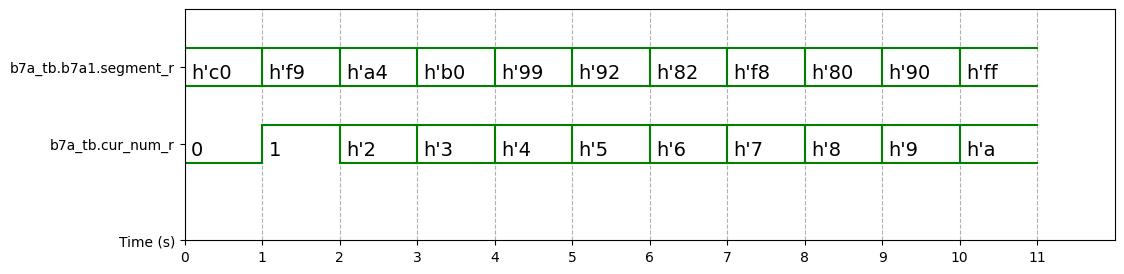

In [ ]:
%%waveform b7a.vcd
sign_list = ['b7a_tb.b7a1.segment_r','b7a_tb.cur_num_r']
time_begin = 0
time_end = 11
base = 'hex' # bin, dec, dec2, hex, octal

Sometimes, the 7-Segment (CA to CG) and dp are not in the same case statement.

Table 2: Truth Table for Common Anode type BCD to Seven Segment Decoder, not including DP

| d |   | b3 | b2 | b1 | b0 |   | CA | CB | CC | CD | CE | CF | CG |   | Common | Cathode    | Cathode |   | Cathode    | Cathode |   |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:------:|:----------:|:-------:|:---:|:----------:|:-------:|:---:|
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   | Anode  | [6:0]      | [6:0]   |   | [6:0]      | [6:0]   |   |
| 0 |   | 0  | 0  | 0  | 0  |   | 0  | 0  | 0  | 0  | 0  | 0  | 1  |   | 1’b1   | 7’b0000001 | 7'h01   |   | 7’b1000000 | 7'h40   | 0 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 1 |   | 0  | 0  | 0  | 1  |   | 1  | 0  | 0  | 1  | 1  | 1  | 1  |   | 1’b1   | 7’b1001111 | 7'h4F   |   | 7’b1111001 | 7'h79   | 1 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 2 |   | 0  | 0  | 1  | 0  |   | 0  | 0  | 1  | 0  | 0  | 1  | 0  |   | 1’b1   | 7’b0010010 | 7'h12   |   | 7’b0100100 | 7'h24   | 2 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 3 |   | 0  | 0  | 1  | 1  |   | 0  | 0  | 0  | 0  | 1  | 1  | 0  |   | 1’b1   | 7’b0000110 | 7'h06   |   | 7’b0110000 | 7'h30   | 3 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 4 |   | 0  | 1  | 0  | 0  |   | 1  | 0  | 0  | 1  | 1  | 0  | 0  |   | 1’b1   | 7’b1001100 | 7'h4C   |   | 7’b0011001 | 7'h19   | 4 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 5 |   | 0  | 1  | 0  | 1  |   | 0  | 1  | 0  | 0  | 1  | 0  | 0  |   | 1’b1   | 7’b0100100 | 7'h24   |   | 7’b0010010 | 7'h12   | 5 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 6 |   | 0  | 1  | 1  | 0  |   | 0  | 1  | 0  | 0  | 0  | 0  | 0  |   | 1’b1   | 7’b0100000 | 7'h20   |   | 7’b0000010 | 7'h02   | 6 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 7 |   | 0  | 1  | 1  | 1  |   | 0  | 0  | 0  | 1  | 1  | 1  | 1  |   | 1’b1   | 7’b0001111 | 7'h0F   |   | 7’b1111000 | 7'h78   | 7 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 8 |   | 1  | 0  | 0  | 0  |   | 0  | 0  | 0  | 0  | 0  | 0  | 0  |   | 1’b1   | 7’b0000000 | 7'h00   |   | 7’b0000000 | 7'h00   | 8 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 9 |   | 1  | 0  | 0  | 1  |   | 0  | 0  | 0  | 0  | 1  | 0  | 0  |   | 1’b1   | 7’b0000100 | 7'h04   |   | 7’b0010000 | 7'h10   | 9 |


## 4 SSD

Basys3 board has four 7-segment displays (L3, L2, L1, L0), that can be turned on through AN[3:0].

<img src="https://github.com/pe8sutd/Colab_DSL_Practice25/blob/main/Simulation/img/SSDcircuit.svg?raw=1" width="250">

Figure: 7-segment display connectivity.

## Time multiplexing

The cathodes (CA ... DP) of four seven-segment LEDs (L3,L2,L1,L0) on Basys 3 are connected together as shown in (Figure: 7-segment display connectivity). The reason is the FPGA chip has limited pin out, or it is a way of saving pin count.
Thus, to display 4 different numbers on the 4-digit seven-segment LED display, the cathodes (CA-CG) of the four seven-segment LEDs have to be controlled separately by activating the four seven-segment LEDs at different times (Time Multiplexing).
For example, when L1 is activated by driving AN1 high (U4 = LOW) and the other three LEDs (L0, L2, L3) are deactivated (AN0, AN2, and AN3 not driven).
The cathode pattern (CA-CG) will be used for displaying numbers on L1.
Similarly, L0 to L3 can be displayed by using the same way at different times.

As shwon in (Figure: 7-segment display connectivity), four seven-segment LEDs can be activated by using 4 PNP transistors AN0-AN3. When a transistor is on or the Base terminal (W4, U4, V4, or U2) is low, the corresponding anode is driven high (3.3 V) to activate or enable the corresponding seven-segment LED.
When a LED is deactivated after illuminating, it will darken. To avoid the displaying discontinuity perceived by the human eye, the four seven-segment LEDs should be continuously refreshed at 60 Hz or above (but not too high, usually at 1 kHz), e.g. it should be refreshed at every 1 ms to 16 ms (60 Hz) to 1 ms (1 kHz).


In [ ]:

print("For 60 Hz, t = ", 1/60*1000, "ms")
print("For 1 kHz, t = ", 1/1000*1000, "ms")


For 60 Hz, t =  16.666666666666668 ms
For 1 kHz, t =  1.0 ms


Verilog that related to SSD, extracted from Stopwatch code.

The multiplexing frequency is 500 Hz (60 Hz to 1 kHz), almost 10 times of 50 Hz / 60 Hz, which is fast enough for eyes to detect the multiplexing sequence. The sequence rotates at:

```
DIG3 -> DIG2 -> DIG1 -> DIG4 -> DIG3
 ^                               |
 |_______________________________v
```


```
case(an_r)
        4'b0001: an_r <= 4'b0010;   //DISPLAY ON DIG3
        4'b0010: an_r <= 4'b0100;   //DISPLAY ON DIG2
        4'b0100: an_r <= 4'b1000;   //DISPLAY ON DIG1
        4'b1000: an_r <= 4'b0001;   //DISPLAY ON DIG4
        default: an_r <= 4'b0001;   //DISPLAY ON DIG4
endcase
```

The multiplexing is achieved through "case" statement in synchronous "always" block that is triggered at 500 Hz clock positive edge.
```
always @(negedge rstn or posedge clk_500hz)
```


Please run the following simulation to view the wave of 7-segment driver.

In [ ]:
%%verilog
module drv_7segment(
    input           rstn_i,
    input           clk_500hz,
    input   [3:0]   num3_i,
    input   [3:0]   num2_i,
    input   [3:0]   num1_i,
    input   [3:0]   num0_i,
    output  [3:0]   an_o,
    output  [7:0]   seg_o
);

reg [7:0] segment_r;
reg [3:0] cur_num_r;
reg [3:0] an_r;

assign an_o = ~an_r;       // Common anode inversion
assign seg_o = segment_r;  // Direct segment output

// Anode rotation logic
always @(negedge rstn_i, posedge clk_500hz) begin
    if (!rstn_i) an_r <= 4'b0000;
    else case (an_r)
        4'b0001: an_r <= 4'b0010;  // DIG3
        4'b0010: an_r <= 4'b0100;  // DIG2
        4'b0100: an_r <= 4'b1000;  // DIG1
        default: an_r <= 4'b0001;  // DIG4 (including reset state)
    endcase
end

// Direct input digit selection
always @(*) begin
    case (an_r)
        4'b0001: cur_num_r = num0_i;  // DIG4 (LSB)
        4'b0010: cur_num_r = num1_i;  // DIG3
        4'b0100: cur_num_r = num2_i;  // DIG2
        4'b1000: cur_num_r = num3_i;  // DIG1 (MSB)
        default: cur_num_r = 4'b0;    // All off
    endcase
end

// 7-segment decoder
always @(*) begin
    case (cur_num_r)
        4'h0: segment_r = 8'hC0;  // 0
        4'h1: segment_r = 8'hF9;  // 1
        4'h2: segment_r = 8'hA4;  // 2
        4'h3: segment_r = 8'hB0;  // 3
        4'h4: segment_r = 8'h99;  // 4
        4'h5: segment_r = 8'h92;  // 5
        4'h6: segment_r = 8'h82;  // 6
        4'h7: segment_r = 8'hF8;  // 7
        4'h8: segment_r = 8'h80;  // 8
        4'h9: segment_r = 8'h90;  // 9
        default: segment_r = 8'hFF; // Off
    endcase
end

endmodule


//module tb_drv_7segment();
module tb();

// Testbench signals
reg dut_rstn;
reg dut_clk_500hz;
reg [3:0] dut_num3_i;
reg [3:0] dut_num2_i;
reg [3:0] dut_num1_i;
reg [3:0] dut_num0_i;
wire [3:0] dut_an_o;
wire [7:0] dut_seg_o;

// Instantiate DUT
drv_7segment dut (
    .rstn_i(dut_rstn),
    .clk_500hz(dut_clk_500hz),
    .num3_i(dut_num3_i),
    .num2_i(dut_num2_i),
    .num1_i(dut_num1_i),
    .num0_i(dut_num0_i),
    .an_o(dut_an_o),
    .seg_o(dut_seg_o)
);

// Clock generation (500Hz -> 2ms period)
always begin
    #1 dut_clk_500hz = ~dut_clk_500hz;
end

initial begin
    // Initialize waveform dumping
    //$dumpfile("tb_drv_7segment.vcd");
    //$dumpvars(0, tb_drv_7segment);
    $dumpfile("tb.vcd");
    $dumpvars(0, tb);
    $dumpon;

    // Initialize signals
    dut_clk_500hz = 0;
    dut_rstn = 0;
    dut_num3_i = 4'h1;
    dut_num2_i = 4'h2;
    dut_num1_i = 4'h3;
    dut_num0_i = 4'h4;

    // Reset sequence
    #3 dut_rstn = 1;

    // Test case 1: Normal operation
    #10;

    // Test case 2: Change input values
    dut_num3_i = 4'h5;
    dut_num2_i = 4'h6;
    dut_num1_i = 4'h7;
    dut_num0_i = 4'h8;
    #10

    // Test case 3: Invalid inputs
    dut_num3_i = 4'hF;
    dut_num2_i = 4'hE;
    dut_num1_i = 4'hD;
    dut_num0_i = 4'hC;
    #10
    // End simulation
    #3 $dumpoff;
    $finish();
end

// Monitor signals
always @(posedge dut_clk_500hz) begin
    $display("Time=%0t ANODE=%4b SEG=%8b NUM3=%h NUM2=%h NUM1=%h NUM0=%h",
        $time, dut_an_o, dut_seg_o,
        dut_num3_i, dut_num2_i, dut_num1_i, dut_num0_i);
end

endmodule

VCD info: dumpfile tb.vcd opened for output.
Time=1 ANODE=1111 SEG=11000000 NUM3=1 NUM2=2 NUM1=3 NUM0=4
Time=3 ANODE=1111 SEG=11000000 NUM3=1 NUM2=2 NUM1=3 NUM0=4
Time=5 ANODE=1110 SEG=10011001 NUM3=1 NUM2=2 NUM1=3 NUM0=4
Time=7 ANODE=1101 SEG=10110000 NUM3=1 NUM2=2 NUM1=3 NUM0=4
Time=9 ANODE=1011 SEG=10100100 NUM3=1 NUM2=2 NUM1=3 NUM0=4
Time=11 ANODE=0111 SEG=11111001 NUM3=1 NUM2=2 NUM1=3 NUM0=4
Time=13 ANODE=1110 SEG=10011001 NUM3=5 NUM2=6 NUM1=7 NUM0=8
Time=15 ANODE=1101 SEG=11111000 NUM3=5 NUM2=6 NUM1=7 NUM0=8
Time=17 ANODE=1011 SEG=10000010 NUM3=5 NUM2=6 NUM1=7 NUM0=8
Time=19 ANODE=0111 SEG=10010010 NUM3=5 NUM2=6 NUM1=7 NUM0=8
Time=21 ANODE=1110 SEG=10000000 NUM3=5 NUM2=6 NUM1=7 NUM0=8
Time=23 ANODE=1101 SEG=11111000 NUM3=f NUM2=e NUM1=d NUM0=c
Time=25 ANODE=1011 SEG=11111111 NUM3=f NUM2=e NUM1=d NUM0=c
Time=27 ANODE=0111 SEG=11111111 NUM3=f NUM2=e NUM1=d NUM0=c
Time=29 ANODE=1110 SEG=11111111 NUM3=f NUM2=e NUM1=d NUM0=c
Time=31 ANODE=1101 SEG=11111111 NUM3=f NUM2=e NUM1=d NUM0=c


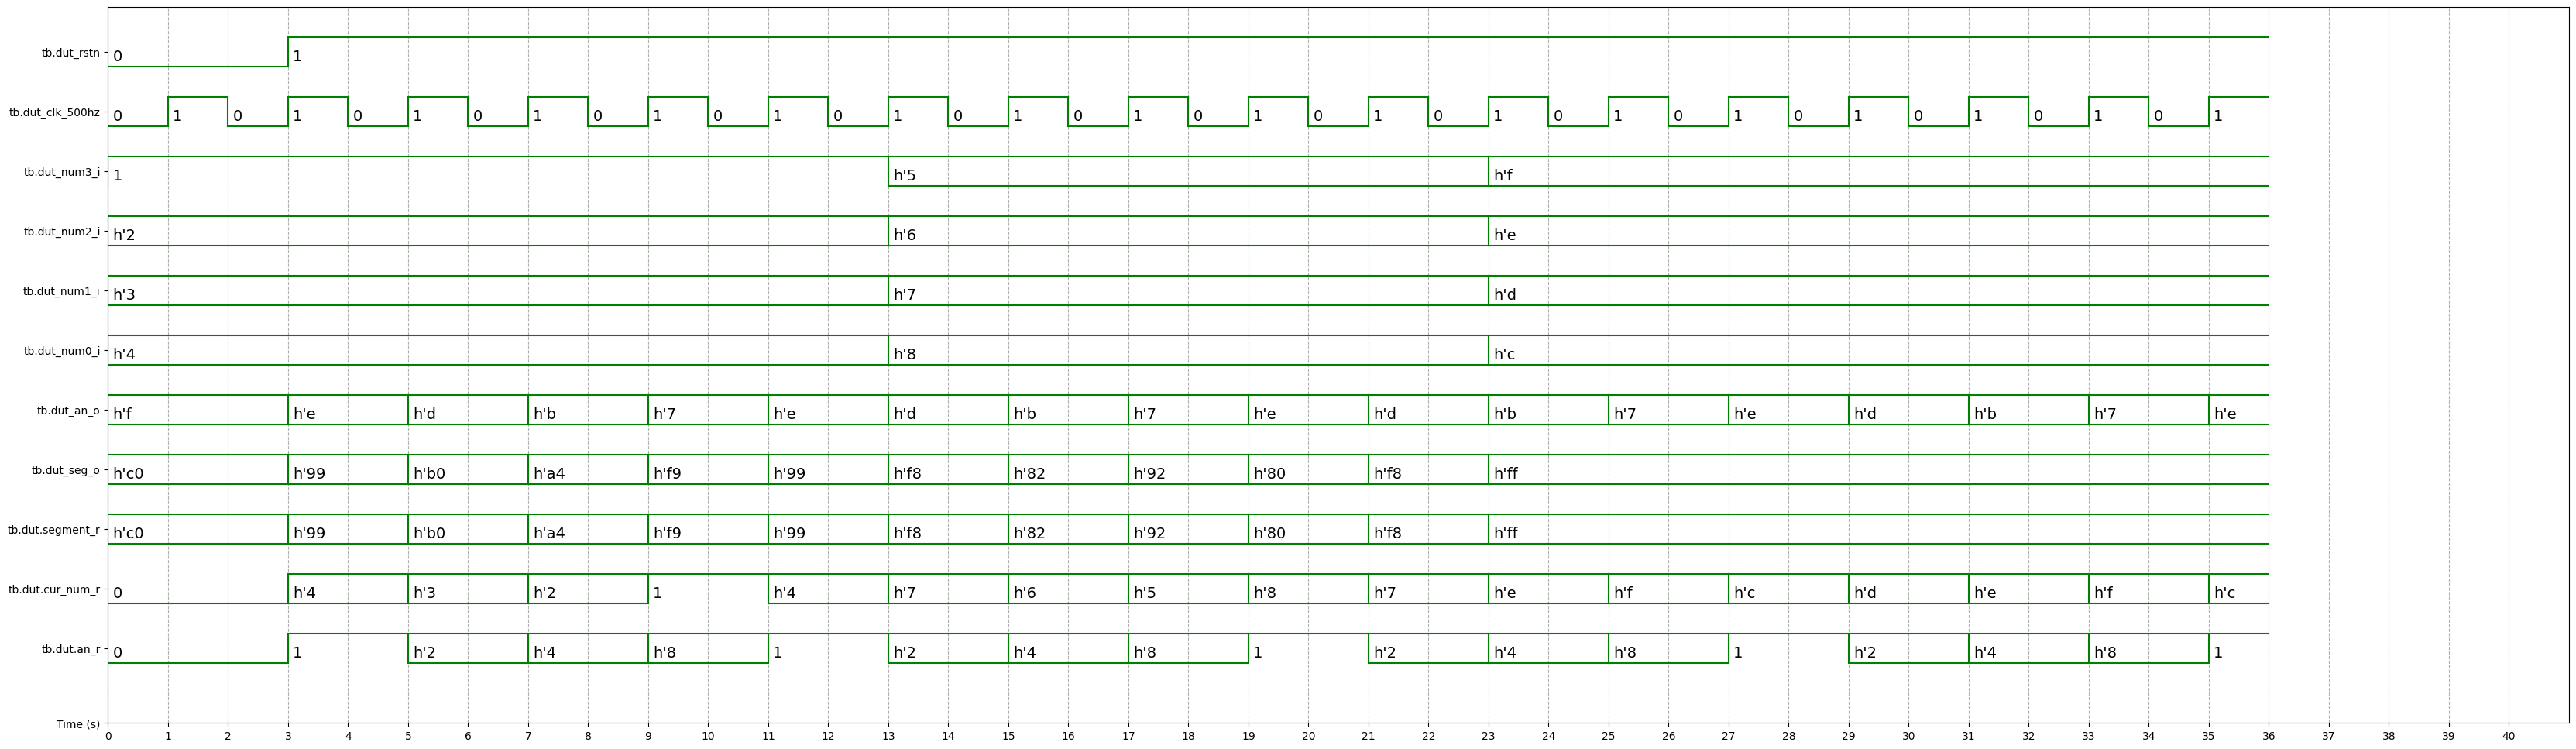

In [ ]:
%%waveform tb.vcd
sign_list = [ 'tb.dut_rstn', 'tb.dut_clk_500hz', 'tb.dut_num3_i', 'tb.dut_num2_i', 'tb.dut_num1_i', 'tb.dut_num0_i', 'tb.dut_an_o', 'tb.dut_seg_o', 'tb.dut.segment_r', 'tb.dut.cur_num_r', 'tb.dut.an_r']
time_begin = 0
time_end = 40  # Covers full simulation duration
base = 'hex'    # hex format for all values

# T02: Stopwatch on Basys 3 (Student Design)

## Instructions  

### FPGA Project  
1. Create a new Vivado project for the Basys 3 FPGA board.  
2. Write Verilog code to implement the stopwatch logic.  
3. Map the Verilog design to the Basys 3 board's resources via the basys3 [constraint file](./Demo_Code/basys3_template.xdc) (`.xdc`).   
4. Generate the bitstream file.
5. Program the FPGA board with the bitstream.  
6. Test and debug your stopwatch design on the FPGA board to ensure correct functionality.  
7. Document your design, including the Verilog code, functional diagrams, and challenges faced during implementation.  
8. **Demo Vivado Project**: [T02_Basys3_StopWatch](./Demo_Code/T02_Basys3_StopWatch)

#Design Steps:

1. Create a new Vivado Project and add Basys3 Board
2. Create Constraint File - Select input and outputs to be used (Right and Center Button, 7 Segment Display)
3. Create Design Source - For module verilog code
4. Create Simulation File - For testbench Code (Set sim file as top)
5. Run simulation
6. Run Synthesis -> Run Implementation -> Generate Bitstream
7. Program Device (Basys3 Board)
8. Test Program on Device (Basys3 Board)

# Stopwatch with Start/Stop

In [ ]:
module stopwatch(
    input clk,        // 100MHz system clock
    input btnR,       // Reset button
    input btnC,       // Start/Stop button
    output reg [6:0] seg,  // 7-segment display output
    output reg [3:0] an   // 7-segment anode control
);

    reg [5:0] seconds = 0;  // 0 to 59 seconds
    reg [6:0] minutes = 0;  // 0 to 99 minutes
    reg state = 1'b0; // Stopwatch state start = 1/ stop = 0

    wire clk_1hz, clk_1khz;
    reg [1:0] count; // 2-bit counter for multiplexing

    wire debounced_btnC;
    debounce debounce_btnC (.clk(clk), .reset(btnR), .button_in(btnC), .button_out(debounced_btnC));

    // Instantiate clock dividers
    clk_divider #(100000000) clk_1hz_gen (.clk_in(clk), .reset(btnR), .clk_out(clk_1hz));   // 1Hz for time update
    clk_divider #(100000) clk_1khz_gen (.clk_in(clk), .reset(btnR), .clk_out(clk_1khz));   // 1kHz for multiplexing

    // **Asynchronous Start/Stop/Reset Control**
    always @(posedge debounced_btnC or posedge btnR) begin
        if (btnR)
            state <= 0; // Reset to zero
        else
            state <= ~state;  // Toggle State for Start/Pause
    end

    // **Time Counter: Updates every second**
    always @(posedge clk_1hz or posedge btnR) begin
        if (btnR) begin
            seconds <= 0;
            minutes <= 0;
        end
        else if (state) begin
            if (seconds == 59) begin
                seconds <= 0;
                if (minutes == 99)
                    minutes <= 0;
                else
                    minutes <= minutes + 1;
            end
            else begin
                seconds <= seconds + 1;
            end
        end
    end

    // 7-segment digit selection (multiplexing)
    always @(posedge clk_1khz) begin
        count <= count + 1;
    end

    // Extract digits for MM:SS display
    wire [3:0] min_tens = minutes / 10;
    wire [3:0] min_ones = minutes % 10;
    wire [3:0] sec_tens = seconds / 10;
    wire [3:0] sec_ones = seconds % 10;

    // 7-segment display multiplexing
    always @(*) begin
        case(count)
            2'b00: begin an = 4'b1110; seg = seg_map(sec_ones); end // L0 -> Seconds (ones)
            2'b01: begin an = 4'b1101; seg = seg_map(sec_tens); end // L1 -> Seconds (tens)
            2'b10: begin an = 4'b1011; seg = seg_map(min_ones); end // L2 -> Minutes (ones)
            2'b11: begin an = 4'b0111; seg = seg_map(min_tens); end // L3 -> Minutes (tens)
            default: begin an = 4'b1111; seg = 7'b1111111; end // All off
        endcase
    end

    // 7-segment lookup function
    function [6:0] seg_map;
        input [3:0] num;
        case(num)
            4'd0: seg_map = 7'b1000000; //0
            4'd1: seg_map = 7'b1111001; //1
            4'd2: seg_map = 7'b0100100; //2
            4'd3: seg_map = 7'b0110000; //3
            4'd4: seg_map = 7'b0011001; //4
            4'd5: seg_map = 7'b0010010; //5
            4'd6: seg_map = 7'b0000010; //6
            4'd7: seg_map = 7'b1111000; //7
            4'd8: seg_map = 7'b0000000; //8
            4'd9: seg_map = 7'b0010000; //9
            default: seg_map = 7'b1111111; // Blank display
        endcase
    endfunction

endmodule

// Clock Divider Module (Parameterized)
module clk_divider #(parameter DIV_VALUE = 100000000)(
    input clk_in,
    input reset,
    output reg clk_out
);
    reg [$clog2(DIV_VALUE)-1:0] count = 0;

    always @(posedge clk_in or posedge reset) begin
        if (reset) begin
            count <= 0;
            clk_out <= 0;
        end else if (count == DIV_VALUE/2 - 1) begin
            clk_out <= ~clk_out;
            count <= 0;
        end else begin
            count <= count + 1;
        end
    end
endmodule

// **Debounce Module for Button**
module debounce (
    input wire clk,        // System clock (e.g., 100 MHz on Basys 3)
    input wire reset,      // Reset signal
    input wire button_in,  // Raw button input
    output reg button_out  // Debounced button output
);

    reg [21:0] count;      // 22-bit counter for debouncing
    reg button_prev;        // Previous state of the button

    always @(posedge clk or posedge reset) begin
        if (reset) begin
            count <= 20'b0;
            button_prev <= 1'b0;
            button_out <= 1'b0;
        end else begin
            button_prev <= button_in;
            if (button_prev != button_in) begin
                count <= 20'b0;
            end else if (count == 20'hFFFFF) begin
                button_out <= button_prev;
            end else begin
                count <= count + 1;
            end
        end
    end

endmodule


## V1 working

In [ ]:
module stopwatch(
    input clk,        // 100MHz system clock
    input btnR,       // Reset button
    input btnC,       // Start/Stop button
    output reg [6:0] seg,  // 7-segment display output
    output reg [3:0] an   // 7-segment anode control
);

    reg [5:0] seconds = 0;  // 0 to 59 seconds
    reg [6:0] minutes = 0;  // 0 to 99 minutes
    reg state = 1'b1; // Stopwatch state start = 1/ stop = 0

    wire clk_1hz, clk_1khz;
    reg [1:0] count; // 2-bit counter for multiplexing

    wire debounced_btnC;
     debounce debounce_btnC (.clk(clk), .reset(btnR), .button_in(btnC), .button_out(debounced_btnC));

    // Instantiate clock dividers
    clk_divider #(100000000) clk_1hz_gen (.clk_in(clk), .reset(btnR), .clk_out(clk_1hz));   // 1Hz for time update
    clk_divider #(100000) clk_1khz_gen (.clk_in(clk), .reset(btnR), .clk_out(clk_1khz));   // 1kHz for multiplexing

    // Start/Stop/Reset
    always @(posedge clk) begin
        if (btnR)
            state <= 0; //Reset to zero
        else if (debounced_btnC)
            state <= ~state;  //Toggle State for Start/Pause
    end


    // Time Counter: Updates every second
    always @(posedge clk_1hz or posedge btnR) begin
        if (btnR) begin
            seconds <= 0;
            minutes <= 0;
        end
        else if (state) begin
            if (seconds == 59) begin
                seconds <= 0;
                if (minutes == 99)
                    minutes <= 0;
                else
                    minutes <= minutes + 1;
            end
            else begin
                seconds <= seconds + 1;
            end
        end
    end

    // 7-segment digit selection (multiplexing)
    always @(posedge clk_1khz) begin
        count <= count + 1;
    end

    // Extract digits for MM:SS display
    wire [3:0] min_tens = minutes / 10;
    wire [3:0] min_ones = minutes % 10;
    wire [3:0] sec_tens = seconds / 10;
    wire [3:0] sec_ones = seconds % 10;

    // 7-segment display multiplexing
    always @(*) begin
        case(count)
            2'b00: begin an = 4'b1110; seg = seg_map(sec_ones); end // L0 -> Seconds (ones)
            2'b01: begin an = 4'b1101; seg = seg_map(sec_tens); end // L1 -> Seconds (tens)
            2'b10: begin an = 4'b1011; seg = seg_map(min_ones); end // L2 -> Minutes (ones)
            2'b11: begin an = 4'b0111; seg = seg_map(min_tens); end // L3 -> Minutes (tens)
            default: begin an = 4'b1111; seg = 7'b1111111; end // All off
        endcase
    end

    // 7-segment lookup function
    function [6:0] seg_map;
        input [3:0] num;
        case(num)
            4'd0: seg_map = 7'b1000000;
            4'd1: seg_map = 7'b1111001;
            4'd2: seg_map = 7'b0100100;
            4'd3: seg_map = 7'b0110000;
            4'd4: seg_map = 7'b0011001;
            4'd5: seg_map = 7'b0010010;
            4'd6: seg_map = 7'b0000010;
            4'd7: seg_map = 7'b1111000;
            4'd8: seg_map = 7'b0000000;
            4'd9: seg_map = 7'b0010000;
            default: seg_map = 7'b1111111; // Blank display
        endcase
    endfunction

endmodule

// Clock Divider Module (Parameterized)
module clk_divider #(parameter DIV_VALUE = 100000000)(
    input clk_in,
    input reset,
    output reg clk_out
);
    reg [$clog2(DIV_VALUE)-1:0] count = 0;

    always @(posedge clk_in or posedge reset) begin
        if (reset) begin
            count <= 0;
            clk_out <= 0;
        end else if (count == DIV_VALUE/2 - 1) begin
            clk_out <= ~clk_out;
            count <= 0;
        end else begin
            count <= count + 1;
        end
    end
endmodule

// **Debounce Module for Button**
module debounce (
    input wire clk,        // System clock (e.g., 100 MHz on Basys 3)
    input wire reset,      // Reset signal
    input wire button_in,  // Raw button input
    output reg button_out  // Debounced button output
);

    reg [21:0] count;      // 22-bit counter for debouncing
    reg button_prev;        // Previous state of the button

    always @(posedge clk or posedge reset) begin
        if (reset) begin
            count <= 20'b0;
            button_prev <= 1'b0;
            button_out <= 1'b0;
        end else begin
            button_prev <= button_in;
            if (button_prev != button_in) begin
                count <= 20'b0;
            end else if (count == 20'hFFFFF) begin
                button_out <= button_prev;
            end else begin
                count <= count + 1;
            end
        end
    end

endmodule

## Not Working

In [ ]:
module stopwatch(
    input clk,        // 100MHz system clock
    input btnR,       // Reset button
    input btnC,       // Start/Pause button
    output reg [6:0] seg,  // 7-segment display output
    output reg [3:0] an,   // 7-segment anode control
    output reg [4:0] led   // 5 LEDs for debugging
);

    reg [5:0] seconds = 0;  // 0 to 59 seconds
    reg [6:0] minutes = 0;  // 0 to 99 minutes
    reg running = 0;

    wire clk_1hz, clk_1khz;
    reg [1:0] count;

    // Instantiate clock dividers
    clk_divider #(100000000) clk_1hz_gen (.clk_in(clk), .reset(btnR), .clk_out(clk_1hz));
    clk_divider #(100000) clk_1khz_gen (.clk_in(clk), .reset(btnR), .clk_out(clk_1khz));

    // **Debounce & Edge Detection for btnC**
    reg [1:0] btnC_stable = 2'b00;  // ✅ Use 2-bit register for stability
    reg btnC_prev = 0;
    wire btnC_edge;

    always @(posedge clk) begin
        btnC_stable <= {btnC_stable[0], btnC};  // ✅ Shift Register for button stability
        btnC_prev <= btnC_stable[1];
    end

    assign btnC_edge = btnC_stable[1] & ~btnC_prev;  // ✅ Detect rising edge

    // **Start/Pause Toggle**
    always @(posedge clk) begin
        if (btnC_edge) begin
            running <= ~running;
        end
    end

    // **Fix: Proper Synchronization of `running` into `clk_1hz`**
    reg running_sync1 = 0, running_sync2 = 0, toggle_ff = 0;

    always @(posedge clk) begin
        if (btnC_edge) begin
            toggle_ff <= ~toggle_ff; // ✅ Toggle on button press
        end
    end

    always @(posedge clk_1hz) begin
        running_sync1 <= toggle_ff;  // ✅ First stage sync
        running_sync2 <= running_sync1;  // ✅ Second stage sync
    end

    // **Time Counter**
    always @(posedge clk_1hz or posedge btnR) begin
        if (btnR) begin
            seconds <= 0;
            minutes <= 0;
            running_sync1 <= 0;
            running_sync2 <= 0;
        end
        else if (running_sync2) begin
            if (seconds == 59) begin
                seconds <= 0;
                if (minutes == 99)
                    minutes <= 0;
                else
                    minutes <= minutes + 1;
            end
            else begin
                seconds <= seconds + 1;
            end
        end
    end

    // **Debug LEDs**
    always @(posedge clk) begin
        led[0] <= clk_1hz;      // ✅ LED 0 blinks every second (Clock Debug)
        led[1] <= running;      // ✅ LED 1 toggles ON/OFF when pressing `btnC`
        led[2] <= btnC_stable[1];  // ✅ LED 2 lights up when `btnC` is pressed (Debounce Debug)
        led[3] <= running_sync2; // ✅ LED 3 now follows `running_sync2`
        led[4] <= seconds[0];   // ✅ LED 4 blinks every 2 sec if counter is updating
    end

    // **7-segment digit selection (multiplexing)**
    always @(posedge clk_1khz) begin
        count <= count + 1;
    end

    // **Extract digits for MM:SS display**
    wire [3:0] min_tens = minutes / 10;
    wire [3:0] min_ones = minutes % 10;
    wire [3:0] sec_tens = seconds / 10;
    wire [3:0] sec_ones = seconds % 10;

    // **7-segment display multiplexing**
    always @(*) begin
        case(count)
            2'b00: begin an = 4'b1110; seg = seg_map(sec_ones); end // L0 -> Seconds (ones)
            2'b01: begin an = 4'b1101; seg = seg_map(sec_tens); end // L1 -> Seconds (tens)
            2'b10: begin an = 4'b1011; seg = seg_map(min_ones); end // L2 -> Minutes (ones)
            2'b11: begin an = 4'b0111; seg = seg_map(min_tens); end // L3 -> Minutes (tens)
            default: begin an = 4'b1111; seg = 7'b1111111; end // All off
        endcase
    end

    // **7-Segment Decoder Function**
    function [6:0] seg_map;
        input [3:0] digit;
        begin
            case(digit)
                4'd0: seg_map = 7'b1000000; // 0
                4'd1: seg_map = 7'b1111001; // 1
                4'd2: seg_map = 7'b0100100; // 2
                4'd3: seg_map = 7'b0110000; // 3
                4'd4: seg_map = 7'b0011001; // 4
                4'd5: seg_map = 7'b0010010; // 5
                4'd6: seg_map = 7'b0000010; // 6
                4'd7: seg_map = 7'b1111000; // 7
                4'd8: seg_map = 7'b0000000; // 8
                4'd9: seg_map = 7'b0010000; // 9
                default: seg_map = 7'b1111111; // Blank display
            endcase
        end
    endfunction

endmodule

// **Clock Divider Module (Parameterized)**
module clk_divider #(parameter DIV_VALUE = 100000000)(
    input clk_in,
    input reset,
    output reg clk_out
);
    reg [$clog2(DIV_VALUE)-1:0] count = 0;

    always @(posedge clk_in or posedge reset) begin
        if (reset) begin
            count <= 0;
            clk_out <= 0;
        end else if (count == DIV_VALUE/2 - 1) begin
            clk_out <= ~clk_out;
            count <= 0;
        end else begin
            count <= count + 1;
        end
    end
endmodule


In [ ]:
module stopwatch(
    input clk,        // 100MHz system clock
    input btnR,       // Reset button
    input btnC,       // Start/Pause button
    output reg [6:0] seg,  // 7-segment display output
    output reg [3:0] an   // 7-segment anode control
);

    reg [5:0] seconds = 0;  // 0 to 59 seconds
    reg [6:0] minutes = 0;  // 0 to 99 minutes

    wire clk_1hz, clk_1khz;
    reg [1:0] count; // 2-bit counter for multiplexing

    reg state = 0; // 0: stop/pause, 1: start
    wire debounced_btnC;

    // Instantiate clock dividers
    clk_divider #(100000000) clk_1hz_gen (.clk_in(clk), .reset(btnR), .clk_out(clk_1hz));   // 1Hz for time update
    clk_divider #(100000) clk_1khz_gen (.clk_in(clk), .reset(btnR), .clk_out(clk_1khz));   // 1kHz for multiplexing

    // Debounce the start/stop button
    debounce debounce_btnC (.clk(clk), .reset(btnR), .button_in(btnC), .button_out(debounced_btnC));

    // Button edge detection
    reg btnC_prev = 0;
    always @(posedge clk) begin
        btnC_prev <= debounced_btnC;
    end
    wire btnC_edge = debounced_btnC & ~btnC_prev; // Detect rising edge

    // Toggle state on button press
    always @(posedge clk) begin
        if (btnC_edge) begin
            state <= ~state;
        end
    end

    // **Fixed: Time Counter - Holds value when paused**
    always @(posedge clk_1hz or posedge btnR) begin
        if (btnR) begin
            seconds <= 0;
            minutes <= 0;
            state <= 0; // Reset also stops the timer
        end
        else if (state == 1) begin  // Only update if state == 1 (running)
            if (seconds == 59) begin
                seconds <= 0;
                if (minutes == 99)
                    minutes <= 0;
                else
                    minutes <= minutes + 1;
            end
            else begin
                seconds <= seconds + 1;
            end
        end
    end

    // 7-segment digit selection (multiplexing)
    always @(posedge clk_1khz) begin
        count <= count + 1;
    end

    // Extract digits for MM:SS display
    wire [3:0] min_tens = minutes / 10;
    wire [3:0] min_ones = minutes % 10;
    wire [3:0] sec_tens = seconds / 10;
    wire [3:0] sec_ones = seconds % 10;

    // 7-segment display multiplexing
    always @(*) begin
        case(count)
            2'b00: begin an = 4'b1110; seg = seg_map(sec_ones); end // L0 -> Seconds (ones)
            2'b01: begin an = 4'b1101; seg = seg_map(sec_tens); end // L1 -> Seconds (tens)
            2'b10: begin an = 4'b1011; seg = seg_map(min_ones); end // L2 -> Minutes (ones)
            2'b11: begin an = 4'b0111; seg = seg_map(min_tens); end // L3 -> Minutes (tens)
            default: begin an = 4'b1111; seg = 7'b1111111; end // All off
        endcase
    end

    // 7-segment lookup function
    function [6:0] seg_map;
        input [3:0] num;
        case(num)
            4'd0: seg_map = 7'b1000000;
            4'd1: seg_map = 7'b1111001;
            4'd2: seg_map = 7'b0100100;
            4'd3: seg_map = 7'b0110000;
            4'd4: seg_map = 7'b0011001;
            4'd5: seg_map = 7'b0010010;
            4'd6: seg_map = 7'b0000010;
            4'd7: seg_map = 7'b1111000;
            4'd8: seg_map = 7'b0000000;
            4'd9: seg_map = 7'b0010000;
            default: seg_map = 7'b1111111; // Blank display
        endcase
    endfunction

endmodule

// **Debounce Module for Button**
module debounce (
    input wire clk,        // System clock (e.g., 100 MHz on Basys 3)
    input wire reset,      // Reset signal
    input wire button_in,  // Raw button input
    output reg button_out  // Debounced button output
);

    reg [19:0] count;      // 20-bit counter for debouncing
    reg button_prev;        // Previous state of the button

    always @(posedge clk or posedge reset) begin
        if (reset) begin
            count <= 20'b0;
            button_prev <= 1'b0;
            button_out <= 1'b0;
        end else begin
            button_prev <= button_in;
            if (button_prev != button_in) begin
                count <= 20'b0;
            end else if (count == 20'hFFFFF) begin
                button_out <= button_prev;
            end else begin
                count <= count + 1;
            end
        end
    end

endmodule

// **Clock Divider Module (Parameterized)**
module clk_divider #(parameter DIV_VALUE = 100000000)(
    input clk_in,
    input reset,
    output reg clk_out
);
    reg [$clog2(DIV_VALUE)-1:0] count = 0;

    always @(posedge clk_in or posedge reset) begin
        if (reset) begin
            count <= 0;
            clk_out <= 0;
        end else if (count == DIV_VALUE/2 - 1) begin
            clk_out <= ~clk_out;
            count <= 0;
        end else begin
            count <= count + 1;
        end
    end
endmodule


# First working Prototype code

In [ ]:
module stopwatch(
    input clk,        // 100MHz system clock
    input btnR,       // Reset button
    output reg [6:0] seg,  // 7-segment display output
    output reg [3:0] an   // 7-segment anode control
);

    reg [5:0] seconds = 0;  // 0 to 59 seconds
    reg [6:0] minutes = 0;  // 0 to 99 minutes

    wire clk_1hz, clk_1khz;
    reg [1:0] count; // 2-bit counter for multiplexing

    // Instantiate clock dividers
    clk_divider #(100000000) clk_1hz_gen (.clk_in(clk), .reset(btnR), .clk_out(clk_1hz));   // 1Hz for time update
    clk_divider #(100000) clk_1khz_gen (.clk_in(clk), .reset(btnR), .clk_out(clk_1khz));   // 1kHz for multiplexing

    // Time Counter: Updates every second
    always @(posedge clk_1hz or posedge btnR) begin
        if (btnR) begin
            seconds <= 0;
            minutes <= 0;
        end
        else begin
            if (seconds == 59) begin
                seconds <= 0;
                if (minutes == 99)
                    minutes <= 0;
                else
                    minutes <= minutes + 1;
            end
            else begin
                seconds <= seconds + 1;
            end
        end
    end

    // 7-segment digit selection (multiplexing)
    always @(posedge clk_1khz) begin
        count <= count + 1;
    end

    // Extract digits for MM:SS display
    wire [3:0] min_tens = minutes / 10;
    wire [3:0] min_ones = minutes % 10;
    wire [3:0] sec_tens = seconds / 10;
    wire [3:0] sec_ones = seconds % 10;

    // 7-segment display multiplexing
    always @(*) begin
        case(count)
            2'b00: begin an = 4'b1110; seg = seg_map(sec_ones); end // L0 -> Seconds (ones)
            2'b01: begin an = 4'b1101; seg = seg_map(sec_tens); end // L1 -> Seconds (tens)
            2'b10: begin an = 4'b1011; seg = seg_map(min_ones); end // L2 -> Minutes (ones)
            2'b11: begin an = 4'b0111; seg = seg_map(min_tens); end // L3 -> Minutes (tens)
            default: begin an = 4'b1111; seg = 7'b1111111; end // All off
        endcase
    end

    // 7-segment lookup function
    function [6:0] seg_map;
        input [3:0] num;
        case(num)
            4'd0: seg_map = 7'b1000000;
            4'd1: seg_map = 7'b1111001;
            4'd2: seg_map = 7'b0100100;
            4'd3: seg_map = 7'b0110000;
            4'd4: seg_map = 7'b0011001;
            4'd5: seg_map = 7'b0010010;
            4'd6: seg_map = 7'b0000010;
            4'd7: seg_map = 7'b1111000;
            4'd8: seg_map = 7'b0000000;
            4'd9: seg_map = 7'b0010000;
            default: seg_map = 7'b1111111; // Blank display
        endcase
    endfunction

endmodule

// Clock Divider Module (Parameterized)
module clk_divider #(parameter DIV_VALUE = 100000000)(
    input clk_in,
    input reset,
    output reg clk_out
);
    reg [$clog2(DIV_VALUE)-1:0] count = 0;

    always @(posedge clk_in or posedge reset) begin
        if (reset) begin
            count <= 0;
            clk_out <= 0;
        end else if (count == DIV_VALUE/2 - 1) begin
            clk_out <= ~clk_out;
            count <= 0;
        end else begin
            count <= count + 1;
        end
    end
endmodule


# Test Bench


In [2]:
%%verilog
module stopwatch(
    input btnR,
    input btnC,
    input clk,
    output [3:0] min_tens,
    output [3:0] min_ones,
    output [3:0] sec_tens,
    output [3:0] sec_ones
);

reg [3:0] min_tens = 0;
reg [3:0] min_ones = 0;
reg [3:0] sec_tens = 0;
reg [3:0] sec_ones = 0;
reg running = 1'b1;
always @(posedge btnR or posedge btnC) begin
    if (btnR)
        running <= 0;           // Stop when reset
    else if (btnC)
        running <= ~running;    // Toggle running state
end


always @(posedge clk or posedge btnR) begin
    if (btnR) begin
        min_tens <= 0;
        min_ones <= 0;
        sec_tens <= 0;
        sec_ones <= 0;
     end
     else if (running) begin
        sec_ones <= sec_ones + 1;

            if (sec_ones == 9) begin
                sec_ones <= 0;
                sec_tens <= sec_tens + 1;
            end

            if (sec_tens == 5 && sec_ones == 9) begin
                sec_tens <= 0;
                min_ones <= min_ones + 1;
            end

            if (min_ones == 9 && sec_tens == 5 && sec_ones == 9) begin
                min_ones <= 0;
                min_tens <= min_tens + 1;
            end

            if (min_tens == 9 && min_ones == 9 && sec_tens == 5 && sec_ones == 9) begin
                min_tens <= 0;
                min_ones <= 0;
                sec_tens <= 0;
                sec_ones <= 0;
            end
        end
    end

endmodule

// 1Hz clock
module tb;
    reg btnR;
    reg btnC;
    reg clk;
    wire [3:0] min_tens;
    wire [3:0] min_ones;
    wire [3:0] sec_tens;
    wire [3:0] sec_ones;

stopwatch uut(btnR, btnC, clk, min_tens, min_ones, sec_tens, sec_ones);

initial begin
clk = 0;
forever #1 clk = ~clk;
end

initial begin
    $dumpfile("tb.vcd");
    $dumpvars(0, tb);
end

initial begin
btnR = 1'b0;
btnC = 1'b0;
#5 btnC = 1'b1;
#5 btnC = 1'b0;
#5 btnC = 1'b1;
#5 btnC = 1'b0;
#5 btnR = 1'b1;
#5 btnR = 1'b0;
#5 btnC = 1'b1;
#5 btnC = 1'b0;
#10000 $finish;
$dumpoff;
end

endmodule

Installing. Please wait... done!
VCD info: dumpfile tb.vcd opened for output.



In [15]:
%%verilog

module stopwatch(
    input clk,        // 100MHz system clock
    input btnR,       // Reset button
    input btnC,       // Start/Stop button
    output [3:0] min_tens,
    output [3:0] min_ones,
    output [3:0] sec_tens,
    output [3:0] sec_ones
);

    reg [5:0] seconds = 0;  // 0 to 59 seconds
    reg [6:0] minutes = 0;  // 0 to 99 minutes
    reg state = 1'b0; // Stopwatch state start = 1/ stop = 0

    reg [1:0] count; // 2-bit counter for multiplexing

    reg [3:0] min_tens = 0;
    reg [3:0] min_ones = 0;
    reg [3:0] sec_tens = 0;
    reg [3:0] sec_ones = 0;

    // **Asynchronous Start/Stop/Reset Control**
    always @(posedge btnC or posedge btnR) begin
        if (btnR)
            state <= 0; // Reset to zero
        else
            state <= ~state;  // Toggle State for Start/Pause
    end

    // **Time Counter: Updates every second**
    always @(posedge clk or posedge btnR) begin
        if (btnR) begin
            seconds <= 0;
            minutes <= 0;
        end
        else if (state) begin
            if (seconds == 59) begin
                seconds <= 0;
                if (minutes == 99)
                    minutes <= 0;
                else
                    minutes <= minutes + 1;
            end
            else begin
                seconds <= seconds + 1;
            end
        end
    end

always @(*) begin
    min_tens = minutes / 10;
    min_ones = minutes % 10;
    sec_tens = seconds / 10;
    sec_ones = seconds % 10;
end

endmodule



//----TESTBENCH----
module stopwatch_tb;
    reg clk;
    reg btnR;
    reg btnC;
    wire [3:0] min_tens;
    wire [3:0] min_ones;
    wire [3:0] sec_tens;
    wire [3:0] sec_ones;

    // Instantiate the stopwatch module
    stopwatch uut (
        .clk(clk),
        .btnR(btnR),
        .btnC(btnC),
        .min_tens( min_tens),
        .min_ones( min_ones),
        .sec_tens( sec_tens),
        .sec_ones(sec_ones)
    );

    // Proper Clock Generation
    always #1 clk = ~clk;  // Toggle clock every 1 time unit

    initial begin

    $dumpfile("stopwatch_tb.vcd");
    $dumpvars(0, stopwatch_tb);
    $dumpon;

        // Initialize inputs
        clk = 0;
        btnR = 1;
        btnC = 0;
        #2;  // Hold reset for some time
        btnR = 0;

        // Start the stopwatch
        #1 btnC = 1;
        #1 btnC = 0; // Simulating button press

        // Wait for a few simulated seconds
        #5;

        // Pause the stopwatch
        #1 btnC = 1;
        #1 btnC = 0;

        // Wait and observe display
        #5;

        // Resume the stopwatch
        #1 btnC = 1;
        #1 btnC = 0;

        // Run for more simulated seconds
        #5;

        // Reset the stopwatch
        #1 btnR = 1;
        #1 btnR = 0;

        // End simulation
        #40;
        $dumpoff;
        $finish;
    end
endmodule

VCD info: dumpfile stopwatch_tb.vcd opened for output.



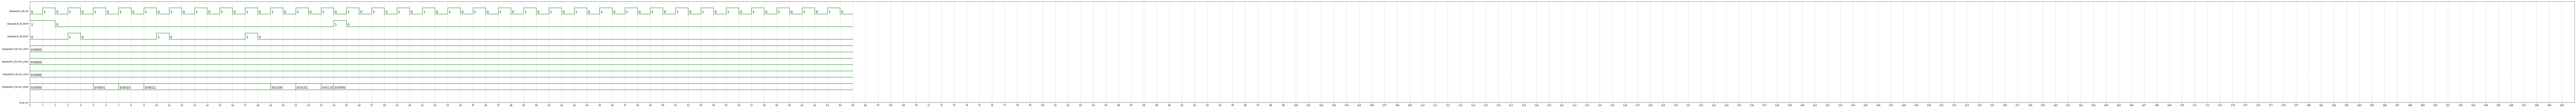

In [16]:
%%waveform stopwatch_tb.vcd
sign_list = ['stopwatch_tb.clk','stopwatch_tb.btnR','stopwatch_tb.btnC','stopwatch_tb.min_tens','stopwatch_tb.min_ones','stopwatch_tb.sec_tens','stopwatch_tb.sec_ones']
time_begin = 0
time_end = 200
base = 'bin'


# Challenges and Lesson Learned

1. Keeping track of the code -> As the code expand there are more variable to keep track. Taking things step by step and give clear variable names and modules helped
2. Keep Code simple -> do not keep stacking nested loops, break down what portion need do what and work from there
3. Do not take AI code as default -> there is a tendency for AI to give simple starter code but when functions are added they can add my unnecessary modules and and variable making it more complicated. it is better for checking syntext and light editing.
4. Understanding how the code affects the Basys3, such as changing the output of the cathodes (CA -> CG) affects the 7-segment 4-digit display.